In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram

In [3]:
#küme1
x1= np.random.normal(25,5,100)
y1= np.random.normal(25,5,100)
#küme2
x2=np.random.normal(55,5,100)
y2=np.random.normal(60,5,100)
#küme3
x3=np.random.normal(55,5,100)
y3=np.random.normal(15,5,100)

x=np.concatenate((x1,x2,x3),axis=0)
y=np.concatenate((y1,y2,y3),axis=0)

veri_ham={"x":x,"y":y}
veri=pd.DataFrame(veri_ham)
veri.head(5)

,x,y
0,21.837923,26.654324
1,23.732176,23.950219
2,29.058335,21.720386
3,30.976665,36.669960
4,26.625735,31.848307


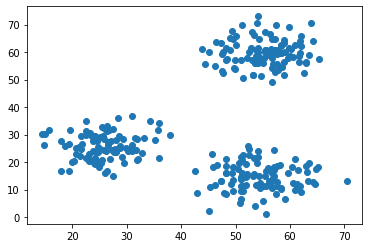

In [4]:
plt.scatter(x,y)
plt.show()

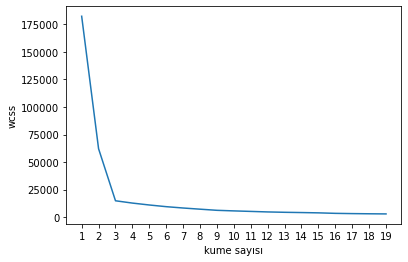

In [7]:
# km1 = KMeans(n_clusters=8)
wcss=[]
for k in range(1,20):
    km=KMeans(n_clusters=k)
    km.fit(veri)
    wcss.append(km.inertia_)

plt.plot(range(1,20),wcss)
plt.xticks(range(1,20))
plt.xlabel("kume sayısı")
plt.ylabel("wcss")
plt.show()

In [10]:
k_means=KMeans(n_clusters=3)
kumeler = k_means.fit_predict(veri) 
veri["etiket"]=kumeler
veri.etiket.unique()

array([2, 0, 1], dtype=int32)

In [17]:
kume0_merkez=k_means.cluster_centers_[0,[0,1]]
kume1_merkez=k_means.cluster_centers_[1,[0,1]]
kume2_merkez=k_means.cluster_centers_[2,[0,1]]
print(kume0_merkez)
print(kume1_merkez)
print(kume2_merkez)

[55.15916585 59.81872097]
[54.3395953  14.52604397]
[25.71914203 25.73688431]


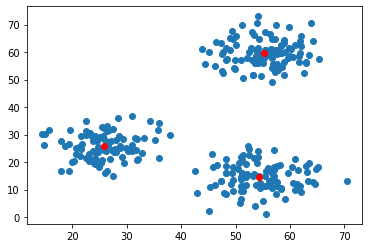

In [18]:
merkez_x=k_means.cluster_centers_[:,0]
merkez_y=k_means.cluster_centers_[:,1]
plt.scatter(x,y)
plt.scatter(merkez_x,merkez_y,color="red")
plt.show()

In [19]:
#küme1
x1_2= np.random.normal(25,5,20)
y1_2= np.random.normal(25,5,20)
#küme2
x2_2=np.random.normal(55,5,20)
y2_2=np.random.normal(60,5,20)
#küme3
x3_2=np.random.normal(55,5,20)
y3_2=np.random.normal(15,5,20)

x_2=np.concatenate((x1_2,x2_2,x3_2),axis=0)
y_2=np.concatenate((y1_2,y2_2,y3_2),axis=0)

veri_ham_2={"x":x_2,"y":y_2}
veri_2=pd.DataFrame(veri_ham_2)
veri_2.head(5)

,x,y
0,19.642315,32.444790
1,18.424832,29.481024
2,18.835549,28.564899
3,32.207055,28.179396
4,32.002705,27.992407


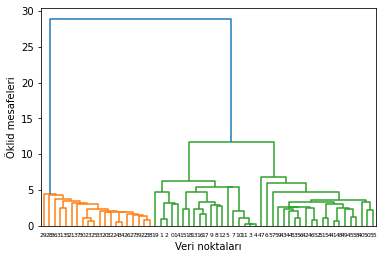

In [25]:
merg = linkage(veri_2,method="single")
dendrogram(merg,leaf_rotation=0)
plt.xlabel("Veri noktaları")
plt.ylabel("Öklid mesafeleri")
plt.show()